In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [3]:
data.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,...,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,...,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,...,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,...,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,...,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,...,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


In [4]:
data['age'].unique()

array([66, 42, 72, 46, 31, 40, 68, 32, 73, 50, 48, 49, 52, 47, 41, 45, 34,
       36, 56, 55, 64, 51, 54, 69, 44, 17,  4, 30, 43, 65, 67, 76, 60, 79,
       21, 57, 27, 61, 70, 58, 63, 26, 33, 53, 19, 29, 74, 75, 62, 39, 10,
       37, 71, 35, 25, 28, 83, 23, 90, 38, 59, 77, 81, 18, 24, 22, 80, 84,
       14, 86, 78, 20,  9,  3, 11, 82,  8, 13, 89,  7, 85, 15, 87,  6, 12,
       88,  5,  2, 16,  1], dtype=int64)

# Feature Engineering

In [5]:
X = data.drop(columns=['churn', 'customer_id'])
Y = data['churn']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X,Y,train_size=0.80, stratify=Y,random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building
## Bagging Logistic Regression

In [8]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)


BaggingClassifier()

In [9]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator=LR(),n_estimators=150,n_jobs=-1,random_state=42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [11]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



In [12]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [13]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
predicted_values = classifier.predict(x_train)
print(classification_report(y_train,predicted_values))

predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.44      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.84      4414



In [15]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1,f2

In [16]:
def effect(train_score,test_score,x_axis,title,maxval,maxval_i):
    plt.figure(figsize=(10,10),dpi=120)
    plt.plot(x_axis,train_score,color = 'red',label = 'train score')
    plt.plot(x_axis,test_score,color = 'blue',label = 'test score')
    plt.axhline(y=maxval, color='yellow', linestyle='--')
    plt.axvline(x=maxval_i, color='yellow', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

In [17]:
classifier = RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
maxdepth = [i for i in range(1, 100)]
train = []
test = []
maxval = -1
maxval_i = None  # Initialize a variable to store the value of i for maxval

for i in maxdepth:
    model = RFC(class_weight='balanced_subsample', n_estimators = i, n_jobs=-1 ,max_depth=7, random_state=101)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    if f2 > maxval:
        maxval = f2
        maxval_i = i

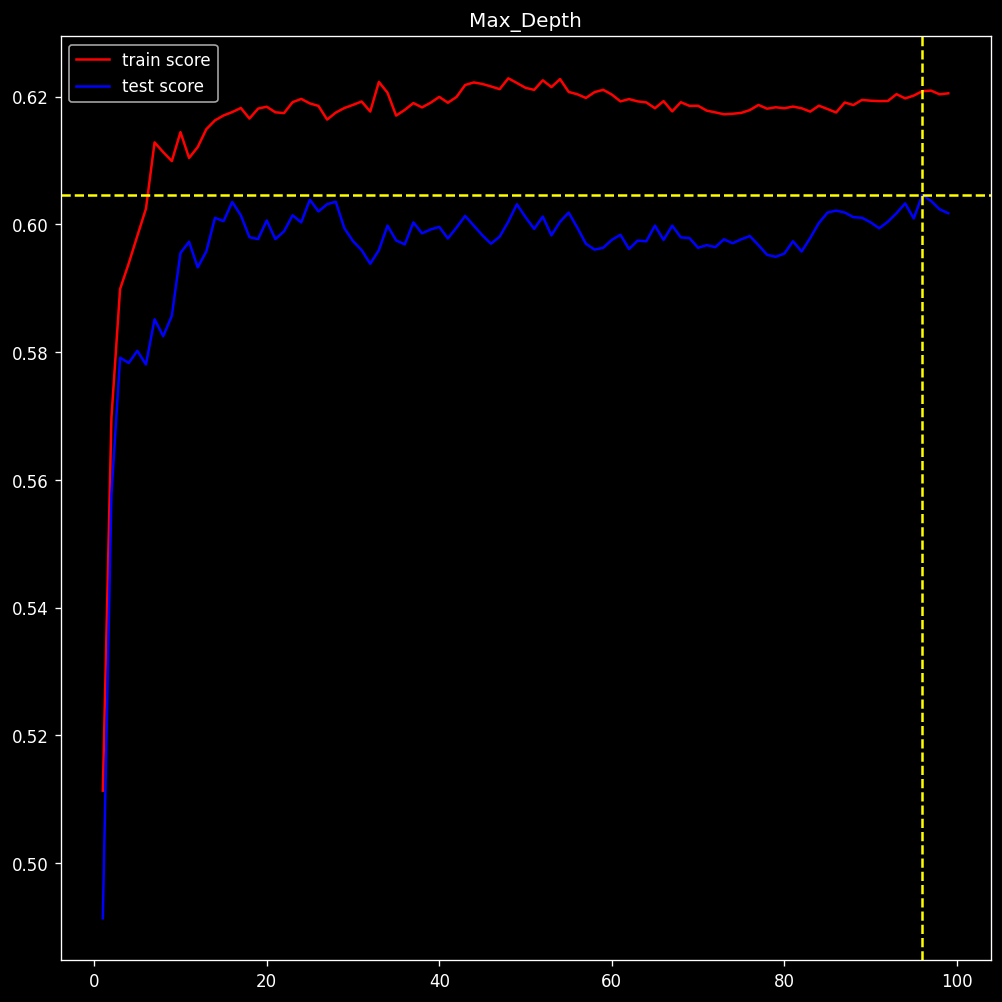

In [20]:
effect(train,test,range(1,100),'Max_Depth',maxval,maxval_i)